# Exercise #4: Probabilistic Modelling of COVID-19 Mortality

### Probabilistic Machine Learning

- **Lecturer**: Prof. Philipp Hennig
- **Term**: SoSe 2020
- **Due Date**: Tuesday, 18 May 2020 at 10am
- Max Haberl (5407084)




## Exam type questions -Gaussian inference:

a) Using the marginals of Gaussians are gaussian lemma:
\begin{align}
p(y) &= \int p(y|w) \cdot p(w) dw = \int \mathcal{N} \left[ \begin{pmatrix} w\\\ y \end{pmatrix}; \begin{pmatrix} \mu \\\ \phi'w \end{pmatrix}; \begin{pmatrix} \Sigma, - \\\ - , \Lambda \end{pmatrix}\right] dw \\\
&= p(y)  = \mathcal{N}(y; \phi'\mu , \Lambda + \phi'\Sigma\phi)
\end{align}

b) Posterior
\begin{align}
p(w|y) = \mathcal{N}(w; \mu + \Sigma\phi(\phi'\Sigma\phi + \Lambda)^{-1}(y - \phi'\mu), \Sigma - \Sigma\phi(\phi'\Sigma\phi + \Lambda)^{-1}\phi'\Sigma)
\end{align}

## Theory Question
a) First derivation
\begin{align}
\underset{w}{\mathrm{argmin}} & -log(p(y|w)) \\ &= -log\left( \frac{1}{2 \pi^{N/2}|\Lambda|^{0.5}} \right) + \frac{1}{2}(y-\phi'w)'\Lambda^{-1}(y-\phi'w)
\end{align}
The latter term is all that needs to be considered for maximization (minimization respectively)
Using ["roweis - matrix id"](https://cs.nyu.edu/~roweis/notes/matrixid.pdf) the derivation can be abbreviated to:
- FOC:
\begin{align}
\frac{\partial -log(p(y|w))}{\partial w} &= \phi'' (-\phi'w +y)(\Lambda^{-1}+\Lambda^{-1}) \overset{!}{=} 0 \quad|(\Lambda^{-1}+\Lambda^{-1})^{-1} \\
&=\phi (y-\phi'w) \overset{!}{=} 0 \\
& w = (\phi\phi')^{-1}\phi w
\end{align}

b)

$\begin{aligned} p(w | y) & \propto p\left(y | w, \phi\right) p(w)=p(w) \cdot \prod_{i=1}^{n} p\left(y_{i} | w, \phi_{i}\right)=p(w) \cdot \prod_{i=1}^{n} \mathcal{N}\left(y_{i} ; \phi_{i}^{\top} w, \sigma^{2}\right) \\ \underset{w}{\arg \max } p(w | y) &=\underset{w}{\arg \min }-\log p(w| y) \\ &=\underset{w}{\arg \min }-\log p(w)+\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left\|y_{i}-\phi_{i}^{{\top}} w\right\|^{2}=\underset{w}{\arg \min } r(w)+\underbrace{\sum_{i=1}^{n} \ell_{2}\left(y_{i} ; w\right)}_{\mathcal{L}( w)} \end{aligned}$


\begin{aligned}
\underset{w}{\mathrm{argmin}} & \left[ w - \left[ \mu + \Sigma \phi(\phi'\Sigma\phi + \Lambda)^{-1}(y - \phi'\mu) \right] \right]' \\
& \left[ \Sigma - \Sigma\phi(\phi'\Sigma\phi + \Lambda)^{-1}\phi'\Sigma \right]^{-1} \cdot \left[ w - \left[ \mu + \Sigma \phi(\phi'\Sigma\phi + \Lambda)^{-1}(y - \phi'\mu) \right] \right] \\
&= \mathcal{L}(w) = ( ... ) + 0.5 (w - b)' C(w - b)
\end{aligned}

FOC, again using ["roweis - matrix id"](https://cs.nyu.edu/~roweis/notes/matrixid.pdf) :
\begin{aligned}
\frac{\partial \mathcal{L}(w)}{\partial w} =& 0.5 (C +C')(wI -b)I \overset{!}{=} 0 \\
&w = b = \mu + \Sigma\phi(\phi'\Sigma\phi + \Lambda)^{-1}(y - \phi'\mu) = E(w|y)
\end{aligned}

Using $\mu = 0, \Sigma = I_{F}, \Lambda = \sigma^2I$, yields:

\begin{aligned}
w &= 0 + I_F \phi'(\phi' I_F \phi + \sigma^2 I)^{-1}(y - \phi'\mu) \\
&= (\phi'\phi + \sigma^2 I_F)^{-1} \phi' y
\end{aligned}

Which is the Tikhanov regularization with $A = \phi$ and $ \Gamma = \sigma I$


## COVID-19 Time-Series Data

**Task:** Download the number of confirmed infections and deaths by COVID-19 per million people from the following links:
- https://ourworldindata.org/grapher/total-confirmed-cases-of-covid-19-per-million-people
- https://ourworldindata.org/grapher/total-covid-deaths-per-million

Load the data from file and retrieve the infection and mortality statistics for the following countries
- Germany
- Italy
- France
- Great Britain
- Spain
- China
- USA

for further analysis.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

# Load data from file
infections_df = pd.read_csv("data/total-confirmed-cases-of-covid-19-per-million-people.csv")
deaths_df = pd.read_csv("data/total-covid-deaths-per-million.csv")

# Filter data for given countries
country_codes = ["DEU", "ITA", "FRA", "GBR", "ESP", "CHN", "USA"]
infections_df = infections_df.loc[infections_df["Code"].isin(country_codes)]
infections_df.columns = ["country", "code", "date", "infections per million"]
deaths_df = deaths_df.loc[deaths_df["Code"].isin(country_codes)]
deaths_df.columns = ["country", "code", "date", "deaths per million"]

# Convert dates to integer starting Dec 31, 2019
def daysfromdate(datestring, startdate="Dec 31, 2019"):
    """Return number of days from ``startdate`` given a date."""
    dayzero = datetime.strptime(startdate, '%b %d, %Y')
    dt = datetime.strptime(datestring, '%b %d, %Y')
    return (dt - dayzero).days

infections_df['date'] = infections_df['date'].apply(daysfromdate)
deaths_df['date'] = deaths_df['date'].apply(daysfromdate)

# Select data from February onward
day0 = 31
infections_df = infections_df.loc[infections_df["date"] > day0]
deaths_df = deaths_df.loc[deaths_df["date"] > day0]

# Pivot to long format
infections_df = infections_df.pivot(index="country", columns="date", values="infections per million")
deaths_df = deaths_df.pivot(index="country", columns="date", values="deaths per million")

# Fill NaNs with zeros
infections_df.fillna(value=0, inplace=True)
deaths_df.fillna(value=0, inplace=True)

# Display tables
# display(infections_df)
display(infections_df.loc[:, 60:])

# Store each timeseries in the row of a numpy array
infections_permil = infections_df.to_numpy()
deaths_permil = deaths_df.to_numpy()

date,60,61,62,63,64,65,66,67,68,69,...,112,113,114,115,116,117,118,119,120,121
country,,,,,,,,,,,,,,,,,,,,,
China,55.133530,55.532328,55.674756,55.762992,55.845670,55.926958,56.045069,56.115241,56.147200,56.178465,...,58.255829,58.266251,58.274588,58.280146,58.290568,58.297515,58.299600,58.317664,58.319053,58.321832
France,0.873249,1.532015,1.991620,2.726987,3.247872,4.366243,6.480423,9.391252,10.969227,17.250489,...,1756.562448,1797.421288,1825.411202,1850.735410,1877.898036,1901.445107,1908.507696,1926.815275,1943.131235,1967.750716
Germany,0.680321,1.324836,1.539674,1.873867,2.339350,3.127091,4.774184,8.163855,10.109335,10.765786,...,1712.225415,1738.925041,1766.997245,1794.890417,1819.417789,1840.149685,1852.299984,1865.954151,1881.517992,1899.158604
Italy,14.686953,18.656399,27.934981,33.674139,41.381481,51.090086,63.808855,76.676478,97.301061,121.977787,...,2997.395315,3042.531231,3098.268878,3142.032027,3191.997437,3230.980711,3269.418186,3298.180134,3332.763938,3367.265045
Spain,0.727198,1.411620,1.775219,2.438253,3.229616,4.277637,5.582317,7.999182,9.196920,12.597642,...,4160.323020,4216.509785,4281.786529,4340.967640,4403.934459,4440.914633,4480.076402,4508.052149,4553.908420,0.000000
United Kingdom,0.265150,0.338803,0.530301,0.589223,0.751259,1.252099,1.694016,2.401084,3.034499,4.021447,...,1837.536350,1900.892561,1966.458359,2033.968592,2113.307479,2185.678804,2251.421368,2314.895424,2373.758809,2433.800640
United States,0.199394,0.208458,0.268880,0.311176,0.377640,0.480359,0.703922,1.021140,1.308147,1.673703,...,2379.896376,2492.551064,2545.686591,2625.876282,2690.383319,2836.995439,2918.133763,2986.232917,3059.138678,3141.693909


## Probabilistic Model of Mortality

We build a simple probabilistic model for the number of infections and the mortality rate for COVID-19. Let 
$X_{ct} \in \mathbb{N}$ denote the latent number of *infected patients* per million people per country $c$ and time point $t$, $Y_{ct}  \in \mathbb{N}$ the number of *observed infections* per million people, $V_{ct}  \in \mathbb{N}$ the number of observed *fatalities* caused by COVID-19 per million, $\tau_c \in [0,1]$ the *testing rate* of infected patients for disease per country and $\rho \in [0,1]$ the *mortality rate* assumed to be constant across time and countries. The following probabilistic graphical model illustrates our setup.
![Probabilistic Graphical Model](figures/graphical_model.png)

**Task:** Making use of the (conditional) independence assumptions encoded in the model, derive the Markov blanket of each of the variables $X_{ct}$, $Y_{ct}$, $V_{ct}$, $\rho$ and $\tau_c$.

_Hint:_ The Markov blanket of a node is the minimal set of nodes in a graph when conditioned upon imply (conditional) independence of all other nodes in the graph, i.e. $\forall B \in V: \ P(A \mid \text{MB}(A), B) = P(A \mid \text{MB}(A))$

The Markov Blankets in terms of their probabilities are given by 

$P(Y_{ct}|X_{ct}, \tau_c)$

$P(V_{ct}|X_{ct}, \rho)$

$P(\rho|X_{ct}, V_{ct})$

$P(X_{ct} \mid Y_{ct}, V_{ct}, \rho, \tau_c) $

$P(\tau|X_{ct}, Y_{ct})$

Following the definition of a Markov blanket, which states that any variable A conditioned on its Markov Blanket is
independent of all variables other than those comprised by the blanket:

- $MB(X_{ct}) = all$
- $MB(Y_{ct}) = \tau_c,X_{ct}$
- $MB(V_{ct}) = X_{ct},\rho$
- $MB(\rho) = X_{ct},V_{ct}$
- $MB(\tau_c) = Y_{ct},X_{ct}$

We make the following assumptions in our probabilistic model. We observe the total number of tests performed and deaths occurred per day.
- $Y_{ct} = y_{ct}$
- $V_{ct} = v_{ct}$

We assume that our observations are corrupted by Gaussian noise given the latent number of infections, the mortality and the testing rate, respectively.
- $Y_{ct} \mid X_{ct}, \tau_c \sim \mathcal{N}(\tau_c X_{ct}, \sigma_y^2)$
- $V_{ct} \mid X_{ct}, \rho \sim \mathcal{N}(\rho X_{ct}, \sigma_v^2)$

where $\sigma_y^2 = 10^{-2}$ and $\sigma_v^2 = 10^{-4}$.

**Task:** What is the underlying assumed relationship between the observed infections $Y_{ct}$ and the observed deaths $V_{ct}$, if the observation noise collapses to zero for $\sigma_y^2 \rightarrow 0$ and $\sigma_v^2 \rightarrow 0$?

Using the results for our DAG's Markov Blanket: $V_{ct}$ & $Y_{ct}$ become independent of each other when
conditioned on their respective blanket. In addition one can use the properties of gaussian products, which yields
the following proportionality relation  when accounting for the postulated limits of the variances:

\begin{align}
p(Y_{ct},V_{ct}|MB(Y_{ct}),MB(V_{ct})) &= p(V_{ct}|X_{ct},\rho) \cdot p(Y_{ct}|X_{ct},\tau_c) \\
&=\mathcal{N}(\tau_c X_{ct},\sigma_y^2) \cdot \mathcal{N}(\rho X_{ct},\sigma_v^2) \\
&\propto \mathcal{N}(\tau_c X_{ct} + \rho X_{ct} , 0)
\end{align}


We assume a direct causal relation between the observed infections and the observed death. The noise collapses to zero if increasing
the sampling size. However, we also assume all other factors to be exogenous, including the track record of the patients which could have
suffered from illnesses before. (However, this is a *_very strong_* assumptions we have to make to draw the causal relationship). 


We model the latent mortality rate as a Beta distribution depending on the latent number of cases and the observed fatalities. Assume the following parameterization
- $\rho \sim \text{Beta}\left(\sum_c V_{ct} + M_\rho \mu_\rho, \sum_c X_{ct} - \sum_c V_{ct} + M_\rho(1-\mu_\rho) \right)$,

where $\mu_\rho=0.05$ is the prior belief about the mortality before observing any data. This choice is motivated by the mortality of the flu (0.001) and SARS (0.1). The hyperparameter $M_\rho=1$ controls the strength of our prior belief about the mortality.

We put a Gaussian prior on the number of latent infections with a constant prior mean function $(\mu_x)_t = 10$ and variance $\sigma_x^2 = 0.1(\mu_x)_t$. modelling our belief over the progress of the disease before observing any actual cases.
- $X_{ct} \sim \mathcal{N}((\mu_x)_t, \sigma_x^2)$

Assuming we are given the observed infections and deaths, the testing and mortality rate, the current number of fatalities at time $t$, then the posterior over the latent number of infections according to our observational model is given by
- $X_{ct} \mid Y_{ct}, V_{ct}, \rho, \tau_c \sim \mathcal{N}(\mu_{ct}, \sigma_c^2)$,

where $\mu_{ct} = \big(\frac{\tau_c y_{ct}}{\sigma_y^2} +\frac{\rho v_{ct}}{\sigma_v^2} + \frac{(\mu_x)_t}{\sigma_x^2} \big)\sigma^{2}$ and $\sigma^2_{ct} =\big(\frac{\tau_c^2}{\sigma_y^2} +\frac{\rho^2}{\sigma_v^2} + \frac{1}{\sigma_x^2} \big)^{-1}$.

This can be derived as follows:
\begin{align}
p(X_{ct} \mid Y_{ct}, V_{ct}, \rho, \tau_c) &\propto p(X_{ct}, Y_{ct}, V_{ct} \mid \rho, \tau_c) = p(Y_{ct} \mid X_{ct}, \tau_c)p(V_{ct} \mid X_{ct}, \rho) p(X_{ct})\\
&=\mathcal{N}(Y_{ct}; \tau_c X_{ct}, \sigma_y^2)\mathcal{N}(V_{ct}; \rho X_{ct}, \sigma_v^2)\mathcal{N}(X_{ct}; (\mu_x)_t, \sigma_x^2)\\
&\propto \exp \bigg[ -\frac{1}{2} \Big(\big(\frac{\tau_c^2}{\sigma_y^2} +\frac{\rho^2}{\sigma_v^2} + \frac{1}{\sigma_x^2} \big)x_{ct}^2 - 2 \big(\frac{\tau_c y_{ct}}{\sigma_y^2} +\frac{\rho v_{ct}}{\sigma_v^2} + \frac{(\mu_x)_t}{\sigma_x^2} \big)x_{ct} \Big)\bigg]\\
&\propto \mathcal{N}(\mu_{ct}, \sigma_{ct}^2)
\end{align}  
    

Finally, we estimate the per country testing rates also using a Beta distribution as above where the observations are given by the latent number of infections and the observed number of infections, like so
- $\tau_c \sim \text{Beta}\left(Y_{ct} + M_\tau \mu_\tau, X_{ct} - Y_{ct} + M_c(1-\mu_\tau) \right)$

where analoguously $\mu_\tau=0.1$ represents the prior belief about the testing rate, which we a priori assume to be the same across countries and $M_\tau=1$ controls the prior influence. Clearly, this assumption is very restrictive as it assumes that the testing rate is constant over time and we do not actually incorporate any data about how many people are tested relative to the entire population in our model. However we can hope to extract some information from the difference in testing rate across countries.

**Task:** Compute the expectation $\mathbb{E}[\rho]$ at a given time $t$. How does it behave for a large numbers of cases (and therefore fatalities)?

Using the definition of a Beta's mean: $E(X) = \frac{\alpha}{\alpha + \beta}$

\begin{align}
\mathbb{E}(\rho) &= \frac{\sum_c V_{ct} + M_\rho \mu_\rho}{(\sum_c V_{ct} + M_\rho \mu_\rho) + (\sum_c X_{ct} - \sum_c V_{ct} + M_\rho(1-\mu_\rho))} \\
&= \frac{\sum_c V_{ct} + 0.05}{\sum_c V_{ct} + 0.05 + \sum_c X_{ct} - \sum_c V_{ct} + 0.95}
\end{align}



One immediately recognizes that the mortality rate is highly dependent on the tacit value of the random variable for
truly infected patients. As it enters positively in the denominator, time $t$ mean for $\rho$ will be small (c.p.) for
higher dark figures and vice versa.

In [2]:
e_rho= ((deaths_df + 0.05).sum(axis = 0))/((deaths_df + 0.05).sum(axis = 0) + infections_df.sum(axis =0) - (deaths_df + 0.95).sum(axis = 0))
print(e_rho.T)

date
32     0.240706
33     0.139742
34     0.100290
35     0.078171
36     0.063159
         ...   
117    0.109758
118    0.109385
119    0.110152
120    0.110859
121    0.114611
Length: 90, dtype: float64


### Inference via Markov-Chain Monte-Carlo

We will now derive an inference procedure for our model based on the observed data. We will implement a Gibbs sampler, a form of Markov-Chain Monte-Carlo. To do so we need to be able to sample from the conditional distributions of every variable given all others.

**Task:** Based on the derived Markov blankets and model assumptions state the conditional distributions (and observed variables) needed to perform one iteration of the Gibbs sampler.

_Hint:_ If you had trouble deriving the Markov blankets, you can also read of conditional independence assumptions directly from the model description.

$P(Y_{ct}|X_{ct}, \tau_c) = \mathcal{N}\left(Y_{ct} ; w_{1} X_{ct}+w_{3} \tau_{c}+\mu_{y}, \sigma_{y}^{2}\right) $

$P(V_{ct}|X_{ct}, \rho) = \mathcal{N}\left(V_{ct} ; w_{1} X_{ct}+w_{3} \rho+\mu_{v}, \sigma_{v}^{2}\right)$

$P(\rho|X_{ct}, V_{ct}) = \mathcal{N}\left(Y_{ct} ; w_{1} X_{ct}+w_{3} \tau_{c}+\mu_{y}, \sigma_{y}^{2}\right) $

$P(\tau_{c}|X_{ct}, Y_{ct}) = \mathcal{N}\left(V_{ct} ; w_{1} X_{ct}+w_{3} \rho+\mu_{v}, \sigma_{v}^{2}\right)$

$P(X_{ct} \mid Y_{ct}, V_{ct}, \rho, \tau_c) = \mathcal{N}(\mu_{ct}, \sigma_c^2)$,


**Task:** Implement a Gibbs sampler to estimate the joint distribution of the latent variables given the observed number of infections and fatal cases over time.

In [3]:
len(infections_permil)

7

In [4]:
import numpy as np

def tao_func(y, mu, x):
    alpha = y + mu
    beta = x- y + 1-mu
    return np.random.beta(alpha, beta, len(y))

def rho_func(v, x, mu):
    #if len(v) == 7:
    alpha = np.sum(v +mu, axis =0) 
    beta = np.sum(x, axis = 0) - np.sum(v + (1-mu), axis = 0)
    #else:
    #alpha = v +mu 
    #beta = x - v + (1-mu)
    return np.random.beta(alpha, beta)

def sample_x(y,v, rho, tao):
    mean = (((tao*y)/10**-2)+(rho*v)/10**-4+10/1)
    variance = np.sqrt((1/((tao**2)/10**-2+(rho**2)/10**-4+1)))
    return np.random.normal(mean,variance)

def sample_y(tau, x, sigma_y = 0.01):
    N = len(x)
    assert len(tau) == N
    variance = sigma_y
    mu = tau * x
    return np.random.normal(mu, variance)


def sample_v(rho, x, sigma_v = 0.0001):
    N = len(x)
    assert len(rho) == N
    variance = sigma_v
    mu = rho * x
    return np.random.normal(mu, variance)

def gibbs(y, v, burnin=50, samples=10000):
    """
    Gibbs sampler to infer parameters of the COVID-19 mortality model.
    
    Parameters
    ----------
    y : ndarray
        Observed infections.
    v : ndarray
        Observed fatalities.
    burnin : int
        Number of burn-in samples.
    samples : int
        Number of samples to draw.
    """
    # Setup
    
    start_mut = 0.1
    start_mu_rho = 0.05
    
    # Initialize Gibbs sampler (by sampling from priors if necessary) 
    x_ini = np.random.normal(10, 0.1, y.shape)
    ini_tao = tao_func(v, start_mut, y)
    ini_rho = rho_func(v, y, start_mu_rho)
    
    # Memory to store the vars in
    tao_p = np.zeros((1, samples), dtype='object'); tao_p[0][0] = ini_tao
    rho_p = np.zeros((1, samples), dtype='object'); rho_p[0][0] = ini_rho
    mat = np.zeros((2, samples), dtype = 'object')
    
    # Sample from conditional distributions
    for i in range(samples-1):
        # Sampling X with different values for rho and tao
        mat[0][i] = sample_x(y,v, rho_p[0][i], tao_p[0][i])
        # sampling the mortality rate with different values for Xt
        mat[1][i] = rho_func(v, mat[0][i], start_mu_rho)
        rho_p[0][i+1] = mat[1][i]
        try:
            tao_p[0][i+1] = tao_func(y, start_mut, mat[0][i])
        # Weve built in a try and exept function such that the function returns results that
        # are more akin to a bad case scenario, since most of the morality rates are upscaled
        # if negative
        except ValueError:
             tao_p[0][i+1] = tao_func(y, start_mut, np.amax(mat[0][i]))
        
    latents  = np.zeros((2, samples - burnin), dtype= 'object')
    latents[0], latents[1] = mat[0][burnin:], mat[1][burnin:]
    
    return latents


### Mortality Rate

**Task:** Compute the posterior mean and 95% credible interval of the marginal distribution $p(\rho \mid Y_{ct}, V_{ct})$ for the mortality rate $\rho$ using the Gibbs sampler. Draw $100\,000$ samples to do so.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3C103A888>]],
      dtype=object)

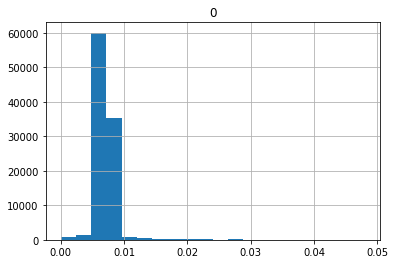

In [10]:
y = infections_permil.sum(axis = 0)
v = deaths_permil.sum(axis = 0)
# Sampling
np.random.seed(1)

# Posterior mean of the mortality rate
latents = gibbs(y, v, 50, 100000)

# Credible interval
mortality = pd.DataFrame(latents[1], dtype = 'float64')
mortality.hist(bins =20)

In [15]:
mort_std = mortality.std()
mean_mort = mortality.mean()
print('The mean mortality is', mean_mort, 'The Standard deviation is', mort_std)

The mean mortality is 0    0.007189
dtype: float64 The Standard deviation is 0    0.002539
dtype: float64


**Task:** Create scatterplots between the testing rate and mortality early on in time and towards the present for China, Germany and Italy. What do you observe? Do your observations match your expectation?


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
China = gibbs(infections_df.iloc[0,:].T, deaths_df.iloc[0,:].T)
Italy = gibbs(infections_df.iloc[3,:].T, deaths_df.iloc[3,:].T)
France = gibbs(infections_df.iloc[1,:].T, deaths_df.iloc[1,:].T)
# Todo: Does not work for Germany as beta is smaller than 0 
Germany = gibbs(y= infections_permil[2].T, v = deaths_permil[2].T)  
# Plot of testing rate versus mortality

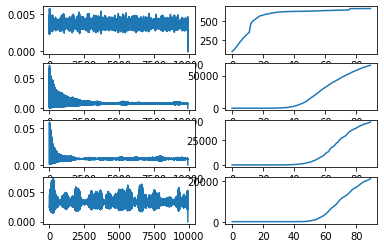

In [13]:
plt.subplot(4,2,1)
plt.plot(China[1])
plt.subplot(4,2,2)
plt.plot(China[0].mean())
plt.subplot(4,2,3)
plt.plot(Italy[1])
plt.subplot(4,2,4)
plt.plot(Italy[0].mean())
plt.subplot(4,2,5)
plt.plot(France[1])
plt.subplot(4,2,6)
plt.plot(France[0].mean())
plt.subplot(4,2,7)
plt.plot(Germany[1])
plt.subplot(4,2,8)
plt.plot(Germany[0].mean())

**Task:** Visualize the estimated mortality rate over time with its associated uncertainty based on the computed distribution. What do you observe? How does your estimate compare to the case fatality rate (CFR)? Are there differences and if yes why?


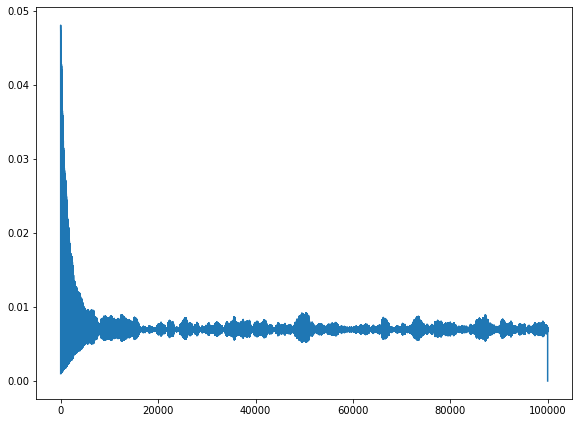

In [14]:
# Setup
days = np.arange(np.shape(infections_permil)[1]) + day0
# Todo: plottings
# Plot
fig1 = plt.figure(figsize =(9.6,7.2))
plt.plot(mortality)
plt.fill_between(mortality[0], y1 = mean_mort - mort_std,
                 y2 = mean_mort + mort_std, color = 'red', alpha = 0.5)

## Model Evaluation and Improvement

**Task:** What simplifying assumptions are you making in your model, which might be violated in reality?
- Excluding in interaction with the mortality rate and other confounding factors that could increase mortality besides corona, such other prerecorded illnesses.
- Not accounting for seasonal trends in time, where the rate of infection was heavily skewed 
- Mortality is normally distirbuted, whereas the mortality of COVID19 is not normally distributed
- Constant prior influence $M_\tau = 1$, $M_\rho = 1$
- The testing rate might well not be constant over time, as countries have shown to reinforce efforts of tackling the ongoing outbreak over the course of time

**Task:** What can you say about the sensitivity of the model with regard to the testing rate $\tau$ and other parameter / prior choices?
- The model is very sensitive to the levels of registered infected but slowly increases

**Task:** How would you improve theSmodel? Describe a more realistic probabilistic model of COVID-19 mortality based on your findings above.
- A realistic COVID 19 model would include seasonal trends, a stochastic ordering of effects (SVAR model) where we model agents behaviour including policy options, such as the lockdown.
- We could run a Graph model where the edges could be translated as connections between registered corona cases in suburbs and run the testing rate and mortality rate more on a local level
- The outbreak of Covid19 could be modelled via a Cauchy process

**Image Sources**:
- Jiumeng Sun, Wanting He, Lifang Wang, et al. COVID-19: epidemiology, evolution, and cross-disciplinary perspectives. _Trends in Molecular Medicine_.

**References**:
-